# Potential flow
_Gilbert François Duivesteijn_

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

### Uniform stream:
\begin{align}
    u = \nabla \phi
\end{align}

In [2]:
def uniform(x, y, u, alpha):
    ux = u*np.cos(alpha)
    uy = u*np.sin(alpha)
    psi = u*(y*np.cos(alpha) - x*np.sin(alpha))
    return ux, uy, psi

### Source
Conservation of mass around a source:
\begin{align}
m = (2\pi r) u_r
\end{align}
Rewriting the equation gives an expression for the velocity $\vec{u}$:

\begin{align}
u_r &= \frac{m}{2 \pi r} \\
u_{\theta} &= 0
\end{align}

In cartesian coordinates, the velocity and streamline gives:

\begin{align}
r &= \sqrt{(x-x_0)^2 + (y-y_0)^2} \\
\theta &= \arctan \left( \frac{y-y_0}{x-x_0} \right) \\
u_r &= \frac{m}{2 \pi r} \\
u_x &= u_r \cos(\theta) \\
u_y &= u_r \sin(\theta) \\
\psi &= \frac{m}{2 \pi} \theta
\end{align}

In [3]:
def source(x, y, m, x0, y0):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    theta = np.arctan2((y-y0),(x-x0))
    ur = m/(2*np.pi*r)
    ux = ur*np.cos(theta)
    uy = ur*np.sin(theta)
    psi = m/(2*np.pi) * theta
    return ux, uy, psi


# Source and sink in uniform stream

In [4]:
N = 200
X0 = -2
XN =  2
Y0 = -2
YN =  2
x = np.linspace(X0, XN, N)
y = np.linspace(Y0, YN, N)
xx, yy = np.meshgrid(x, y)

In [5]:
# free stream
U = 1        # 1 m/s
alpha = 0    # 0 degrees, non-lifting body

u0, v0, psi0 = uniform(xx, yy, U, alpha)

In [6]:
# source
m = 2        # source strength
xs =-1
ys = 0

u1, v1, psi1 = source(xx, yy, m, xs, ys)

In [7]:
# sink
m = -2        # source strength
xs = 1
ys = 0

u2, v2, psi2 = source(xx, yy, m, xs, ys)

In [8]:
u = u0 + u1 + u2
v = v0 + v1 + v2
psi = psi0 + psi1 + psi2
U = np.sqrt(u**2 + v**2)

In [9]:
U.shape

(200, 200)

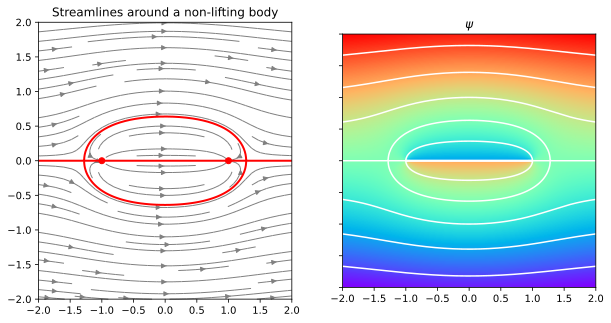

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True)
axs[0].streamplot(xx, yy, u, v, density=1, linewidth=1, color='gray')
axs[0].contour(xx, yy, psi, levels=[0], colors='red', linestyles='solid', linewidths=2)
axs[0].plot(-1, 0, color="red", marker="o")
axs[0].plot(1, 0, color="red", marker="o")
axs[0].set_title("Streamlines around a non-lifting body")
axs[1].imshow(psi, cmap="rainbow", extent=[X0,XN,Y0,YN], origin="lower")
axs[1].contour(xx, yy, psi, colors="white", linestyles="solid")
axs[1].set_title("$\psi$")
plt.show()

Text(0.5, 0.5, 'Y')

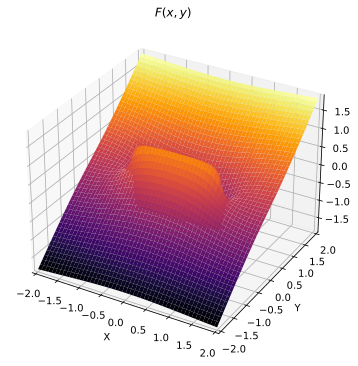

In [11]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(6, 6))
ax = [ax]
ax[0].plot_surface(xx, yy, psi, cmap="inferno", linewidth=1, antialiased=True)
#ax[0].view_init(20, -60)
ax[0].set_xlim(X0, XN)
ax[0].set_ylim(Y0, YN)
#ax[0].set_zlim(-1, 1)
ax[0].set_title("$F(x, y)$")
ax[0].set_xlabel("X")
ax[0].set_ylabel("Y")

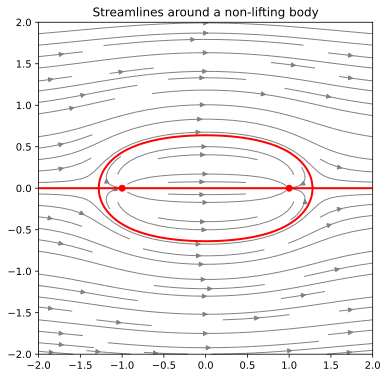

In [12]:
plt.figure(figsize=(6, 6))
plt.streamplot(xx, yy, u, v, density=1, linewidth=1, color='gray')
plt.contour(xx, yy, psi, levels=[0], colors='red', linestyles='solid', linewidths=2)
plt.plot(-1, 0, color="red", marker="o")
plt.plot(1, 0, color="red", marker="o")
plt.title("Streamlines around a non-lifting body")
plt.show()

## Scalar field, directional derivative, gradient

Assume that the scalar is distributed according to the equation
\begin{align}
Q &= xy.
\end{align}

The derivative of $Q$ along the tangent to the curve at any $s$ in a 2D plane is:
\begin{align}
\frac{dQ}{ds} = \frac{\partial Q}{\partial x}\frac{dx}{ds} + \frac{\partial Q}{\partial y}\frac{dy}{ds},
\end{align}



In [13]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
xx, yy = np.meshgrid(x, y)
zz = xx*yy
print(zz.shape)

(100, 100)


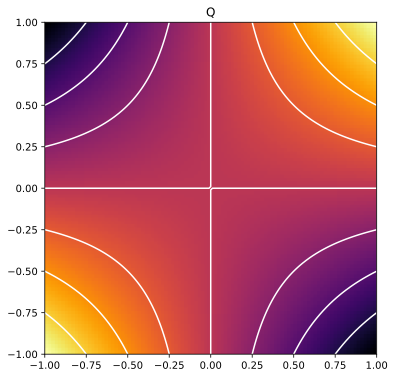

In [14]:
plt.figure(figsize=(6,6))
plt.imshow(zz, cmap="inferno", extent=[-1,1,-1,1], origin="lower")
plt.contour(xx, yy, zz, colors="white", linestyles="solid")
plt.title("Q")
plt.show()

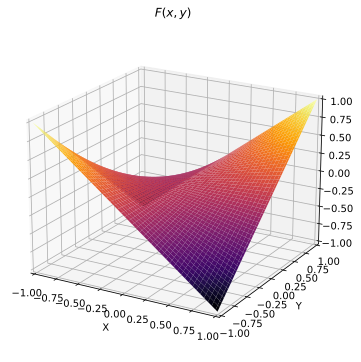

In [15]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(12, 6))
ax.plot_surface(xx, yy, zz, cmap="inferno", linewidth=1, antialiased=True)
ax.view_init(20, -60)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

ax.set_zlim(-1, 1)
ax.set_title("$F(x, y)$")
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.show()